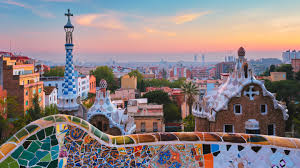

## **Table of Content**


1. INTRODUCTION
>1.1 OVERVIEW<BR>1.2 DATA DESCRIPTION


2. REPOSITORY
>2.1 IMPORT LIBRARIES<BR>2.2 LOAD DATA SET & DATA PREPARATION


3. ANALYSIS
>3.1 AVERAGE PRICE BY NEIGHBOURHOOD <BR>3.2 TOP 10 HOSTS WITH MOST LISTINGS <BR>3.3 DISTRIBUTION OF ROOM TYPES <BR> 3.4 AVERAGE REVIEWS PER MONTH BY NEIGHBOURHOOD <BR> 3.5 LISTINGS WITH PRICE ABOVE $500 <BR>3.6 AVAILABILITY ANALYSIS <BR> 3.7 MINIMUM NIGHTS DISTRIBUTION <BR> 3.8 LISTINGS WITH ZERO REVIEWS <BR> 3.9 MONTHLY REVIEW TREND <BR> 3.10 HOST WITH HIGHEST AVERAGE PRICE



4. CONCLUSION

# **1. INTRODUCTION**
## **1.1 OVERVIEW**
The objective of this project is to analyze Airbnb listings data in Barcelona to uncover insights about pricing, availability, host behavior, and customer engagement. The goal is to provide actionable recommendations for hosts, guests, and platform stakeholders. It involved analyzing Airbnb listings data to understand market dynamics. By leveraging SQL for data querying and Python for analysis and visualization,  key trends in pricing, availability, and host behavior were identified, leading to actionable recommendations for stakeholders.

## **1.2 DATA DESCRIPTION**

The dataset comprises Airbnb listings in the city of Barcelona with attributes such as listing ID, host details, location, pricing, availability, and review metrics. It provides a comprehensive view of the short-term rental market in the selected city.
This [Dataset](https://drive.google.com/file/d/1fC0DmRtJirhD8kJU1FmQYoWUoG0ztKx9/view?usp=sharing) consists of **19422** rows and **18** columns and provides detailed information on listings, including:
* Listing Details: ID, name, host ID, host name.
* Location: Neighborhood, latitude, longitude.
* Pricing: Price per night, minimum nights.
* Availability: Number of days available per year.
* Reviews: Number of reviews, last review date, reviews per month.
* Room Type: Entire home/apt, private room, shared room


# **2. REPOSITORY**
## **2.1 IMPORT LIBRARIES**

In [42]:
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt

## **2.2 LOAD DATASET & DATA PREPARATION**

In [43]:
baca = pd.read_csv("Barcelona_listings.csv")
baca.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,18674,Huge flat for 8 people close to Sagrada Familia,71615,Mireia Maria,Eixample,la Sagrada Família,41.405560,2.17262,Entire home/apt,179.0,1,45,2024-09-16,0.31,29,147,5,HUTB-002062
1,23197,"Forum CCIB DeLuxe, Spacious, Large Balcony, relax",90417,Etain (Marnie),Sant Martí,el Besòs i el Maresme,41.412432,2.21975,Entire home/apt,251.0,3,82,2025-01-03,0.48,1,0,8,HUTB005057
2,32711,Sagrada Familia area - Còrsega 1,135703,Nick,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.405660,2.17015,Entire home/apt,104.0,1,143,2025-03-04,0.86,3,107,31,HUTB-001722
3,34241,Stylish Top Floor Apartment - Ramblas Plaza Real,73163,Andres,Ciutat Vella,el Barri Gòtic,41.380620,2.17517,Entire home/apt,157.0,31,25,2024-11-05,0.14,3,327,15,Exempt
4,34981,VIDRE HOME PLAZA REAL on LAS RAMBLAS,73163,Andres,Ciutat Vella,el Barri Gòtic,41.379780,2.17623,Entire home/apt,401.0,5,256,2025-02-02,1.46,3,191,34,HUTB-150671


In [44]:
baca.shape

(19422, 18)

In [45]:
# data info
baca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19422 entries, 0 to 19421
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              19422 non-null  int64  
 1   name                            19422 non-null  object 
 2   host_id                         19422 non-null  int64  
 3   host_name                       19415 non-null  object 
 4   neighbourhood_group             19422 non-null  object 
 5   neighbourhood                   19422 non-null  object 
 6   latitude                        19422 non-null  float64
 7   longitude                       19422 non-null  float64
 8   room_type                       19422 non-null  object 
 9   price                           15273 non-null  float64
 10  minimum_nights                  19422 non-null  int64  
 11  number_of_reviews               19422 non-null  int64  
 12  last_review                     

In [46]:
# checking for null values
baca.isnull().sum()

,0
id,0
name,0
host_id,0
host_name,7
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,4149


Because there are 4149 null values in the price column, the null values would be filled with the average price of the entire dataset

In [47]:
# replacing null values with mean
baca["price"] = baca["price"].fillna(baca["price"].mean())

# verify
baca.isnull().sum()

,0
id,0
name,0
host_id,0
host_name,7
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


In [48]:
# drop unneeded columns
baca.drop(["latitude", "longitude", "license"], axis=1, inplace=True)

# verify
baca.shape

(19422, 15)

In [49]:
# create a database connection
conn = sqlite3.connect("mydatabase.db")

# load data to sqlite
baca.to_sql("baca", conn, index = False, if_exists = "replace")

19422

# **3. ANALYSIS**
## **3.1 AVERAGE PRICE BY NEIGHBOURHOOD**

In [50]:
# unique count of neighbourhood
query = """
       SELECT COUNT(DISTINCT neighbourhood) as Neigh_Count
       FROM baca;
"""
pd.read_sql_query(query, conn)

,Neigh_Count
0,71


In [51]:
query = """
      SELECT neighbourhood, AVG(price) as Avg_price
      FROM baca
      GROUP BY neighbourhood
      ORDER BY Avg_price DESC
      LIMIT 10;
"""
pd.read_sql_query(query, conn)

,neighbourhood,Avg_price
0,el Coll,429.479881
1,Sants - Badal,272.468313
2,Diagonal Mar i el Front Marítim del Poblenou,254.781652
3,la Vila Olímpica del Poblenou,231.594239
4,Navas,214.407630
5,el Besòs i el Maresme,210.110652
6,la Dreta de l'Eixample,202.845284
7,la Sagrada Família,201.789175
8,el Poblenou,190.546999
9,el Parc i la Llacuna del Poblenou,183.372180


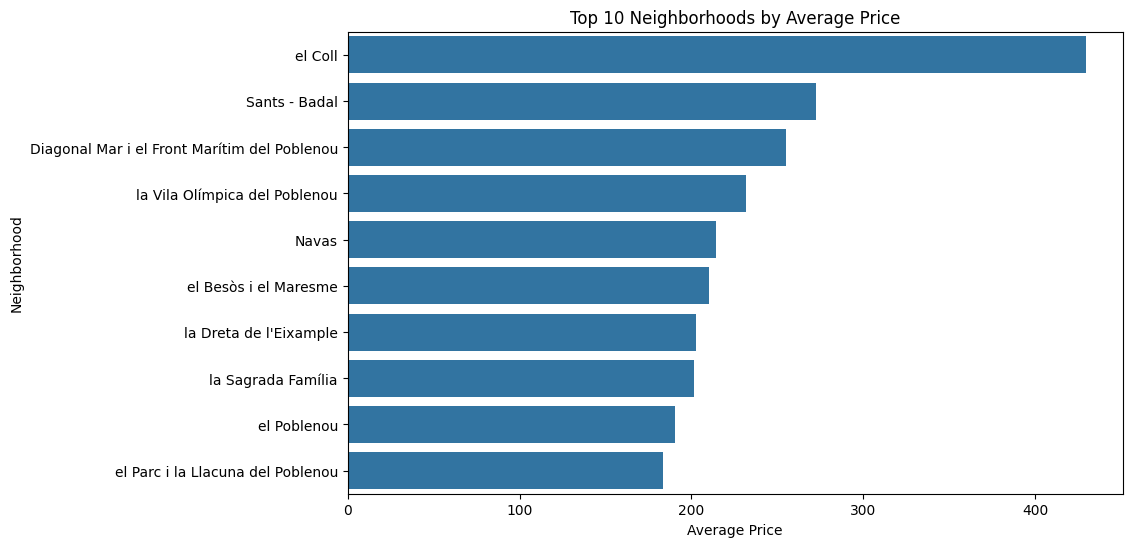

In [52]:
# visuals
Avg_price = pd.read_sql_query("""
SELECT neighbourhood, AVG(price) as Avg_price
FROM baca
GROUP BY neighbourhood
ORDER BY Avg_price DESC
LIMIT 10;
""", conn)

plt.figure(figsize=(10,6))
sns.barplot(x="Avg_price", y="neighbourhood", data=Avg_price)
plt.title("Top 10 Neighborhoods by Average Price")
plt.xlabel("Average Price")
plt.ylabel("Neighborhood")
plt.show()

## **3.2 TOP 10 HOSTS WITH MOST LISTINGS**

In [53]:
query = """
      SELECT host_id, host_name, COUNT(*) as Total_listing
      FROM baca
      GROUP BY host_id, host_name
      ORDER BY Total_listing DESC
      LIMIT 10;
"""
pd.read_sql_query(query, conn)

,host_id,host_name,Total_listing
0,346367515,Ukio,483
1,357946540,Enter,408
2,1447144,Acomodis Apartments,297
3,32037490,SweetInn,233
4,4459553,AB Apartment Barcelona,182
5,299462,Stay U-Nique,163
6,265193861,BeBarceloner,152
7,447375626,Blueground,148
8,504121118,Arnau,139
9,36607755,Room Housing,136


## **3.3 DISTRIBUTION OF ROOM TYPES**

In [54]:
# unique room types
baca["room_type"].unique()

array(['Entire home/apt', 'Private room', 'Hotel room', 'Shared room'],
      dtype=object)

In [55]:
query = """
      SELECT room_type, COUNT(room_type) as Count
      FROM baca
      GROUP BY room_type
      ORDER BY Count;
"""
pd.read_sql_query(query, conn)

,room_type,Count
0,Shared room,60
1,Hotel room,111
2,Private room,7393
3,Entire home/apt,11858


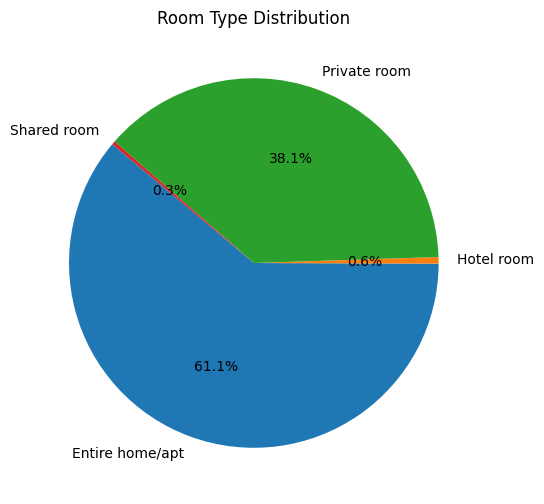

In [56]:
#visuals
Room_type = pd.read_sql_query("""
SELECT room_type, COUNT(*) as count
FROM baca
GROUP BY room_type;
""", conn)

plt.figure(figsize=(6, 6))
plt.pie(Room_type["count"], labels=Room_type["room_type"], autopct='%1.1f%%', startangle=140)
plt.title("Room Type Distribution")
plt.show()

## **3.4 AVERAGE REVIEWS PER MONTH BY NEIGHBORHOOD**

In [57]:
query = """
       SELECT neighbourhood, AVG(reviews_per_month) as Avg_review
       FROM baca
       GROUP BY neighbourhood
       ORDER BY Avg_review;
"""
pd.read_sql_query(query, conn)

,neighbourhood,Avg_review
0,la Clota,0.103333
1,la Font d'en Fargues,0.161111
2,Baró de Viver,0.180000
3,Montbau,0.270000
4,Torre Baró,0.290000
...,...,...
66,la Sagrada Família,1.717153
67,la Maternitat i Sant Ramon,1.756479
68,la Vila Olímpica del Poblenou,2.044369
69,Canyelles,2.520000


## **3.5 LISTINGS WITH PRICE ABOVE $500**

In [58]:
query = """
       SELECT name, price
       FROM baca
       WHERE price > 500
       ORDER BY price;
"""
pd.read_sql_query(query, conn)

,name,price
0,Casa compartida en Parc Güell 6/7 huéspedes,502.0
1,Light & modern apartment with terrace in Barce...,503.0
2,Great 3 bedroom apartment close Passeig de Gra...,503.0
3,SibsBcn- Rambla- Family Friends Business Central,504.0
4,pg Large 3 bedroom 3 bath flat max 10 happy pe...,506.0
...,...,...
403,Pierre & Vacances - Studio 4 Personnes,9059.0
404,Modern Flat next to Bogatell beach,9298.0
405,Estudio cerca de Park Güell,9714.0
406,Amazing loft-style apartment in Las Ramblas,9999.0


## **3.6 AVAILABILITY ANALYSIS**

In [59]:
query = """
       SELECT availability_365, COUNT(*) as count
       FROM baca
       GROUP BY availability_365
       ORDER BY count;
"""
pd.read_sql_query(query, conn)

,availability_365,count
0,109,9
1,26,10
2,42,10
3,13,12
4,131,12
...,...,...
361,364,212
362,2,268
363,365,527
364,1,585


In [60]:
# availability count based on room type
query = """
       SELECT room_type, availability_365, COUNT(*) as count
       FROM baca
       GROUP BY room_type, availability_365
       ORDER BY count;
"""
pd.read_sql_query(query, conn)

,room_type,availability_365,count
0,Hotel room,8,1
1,Hotel room,29,1
2,Hotel room,51,1
3,Hotel room,52,1
4,Hotel room,65,1
...,...,...,...
829,Private room,1,192
830,Entire home/apt,365,350
831,Entire home/apt,1,390
832,Entire home/apt,0,1738


## **3.7 MINIMUM NIGHTS DISTRIBUTION**

In [61]:
query = """
       SELECT minimum_nights, Count(*) as count
       FROM baca
       GROUP BY minimum_nights
       ORDER BY minimum_nights, count;
"""
pd.read_sql_query(query, conn)

,minimum_nights,count
0,1,6060
1,2,2247
2,3,2187
3,4,611
4,5,326
...,...,...
74,730,1
75,865,1
76,900,1
77,1000,2


## **3.8 LISTINGS WITH ZERO REVIEWS**

In [62]:
query = """
       SELECT name
       FROM baca
       WHERE number_of_reviews = 0;
"""
pd.read_sql_query(query, conn)

,name
0,Private terrace in Old town
1,comodas habitaciones
2,Cozy loft with a big terrace!
3,Bonitas habitaciones en barcelona
4,Alquiler de habitaciones barcelona
...,...
4904,@Habitación Barcelona Ciudad
4905,Habitacion Privada
4906,Cozy Double Room in City Center
4907,140. Poble Sec Ent Apartment


## **3.9 MONTHLY REVIEW TREND**

In [63]:
query = """
        SELECT neighbourhood, strftime("%Y-%m", last_review) as month, COUNT(*) as reviews
        FROM baca
        GROUP BY month
        ORDER BY month;
"""
pd.read_sql_query(query, conn)

,neighbourhood,month,reviews
0,el Raval,None,4909
1,Vallcarca i els Penitents,2011-06,1
2,les Corts,2012-04,1
3,"Sant Pere, Santa Caterina i la Ribera",2012-09,1
4,el Raval,2013-08,1
...,...,...,...
128,el Barri Gòtic,2024-11,671
129,la Sagrada Família,2024-12,730
130,el Besòs i el Maresme,2025-01,1394
131,el Barri Gòtic,2025-02,4908


In [64]:
# yearly review trend
query = """
        SELECT strftime("%Y", last_review) as year, COUNT(*) as reviews
        FROM baca
        GROUP BY year
        ORDER BY year;
"""
pd.read_sql_query(query, conn)

,year,reviews
0,None,4909
1,2011,1
2,2012,2
3,2013,3
4,2014,13
5,2015,65
6,2016,134
7,2017,232
8,2018,229
9,2019,373


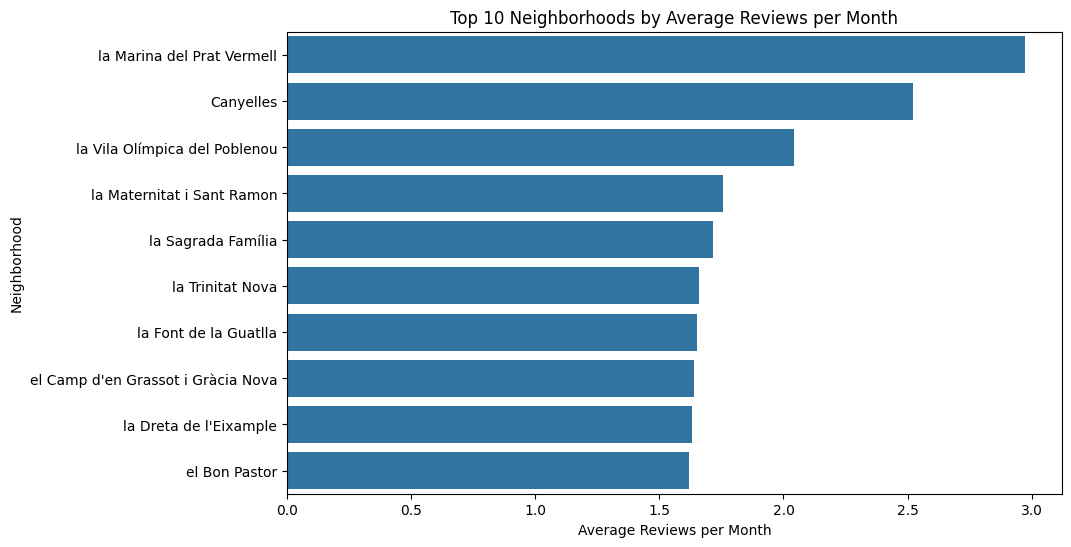

In [65]:
# monthly review trends by neighbourhood
reviews = pd.read_sql_query("""
SELECT neighbourhood, AVG(reviews_per_month) as avg_reviews
FROM baca
GROUP BY neighbourhood
ORDER BY avg_reviews DESC
LIMIT 10;
""", conn)

plt.figure(figsize=(10,6))
sns.barplot(x='avg_reviews', y='neighbourhood', data=reviews)
plt.title('Top 10 Neighborhoods by Average Reviews per Month')
plt.xlabel('Average Reviews per Month')
plt.ylabel('Neighborhood')
plt.show()

## **3.10 HOST WITH HIGHEST AVERAGE PRICE**

In [66]:
query = """
       SELECT host_name, AVG(price) as Avg_price
       FROM baca
       GROUP BY host_name
       ORDER BY Avg_price DESC
       LIMIT 1;
"""
pd.read_sql_query(query, conn)

,host_name,Avg_price
0,Lofts,9999.0


# **4. CONCLUSION**


Through this analysis, a deeper understanding of the Airbnb market dynamics in Barcelona has been gained. The insights derived can guide hosts in optimizing listings and inform platform strategies to enhance user satisfaction and profitability. The following conclusions were derived:
* The ***el Turo de la Peira*** neighbourhood has the lowest average price of 64.677 while the ***el Coll*** neighbourhood has the highest average of 429.479.
* A large percentage of the data have the entire home/apartment room type which is approximately 61%.
* 4909 data from the set are without reviews.